In [1]:
import seaborn as sns #this is the plotting library I'll be using
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

steps = pd.read_csv("Assignment 1 - steps data.csv", delimiter = ";")
survey = pd.read_csv('Assignment 1 - survey data.csv')
steps.head(5)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = pd.merge(steps, survey, on = 'id') 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 338 entries, id to waist
dtypes: float64(331), int64(2), object(5)
memory usage: 2.4+ MB


In [20]:
df['waist'].value_counts() #Get all the values. This may be less useful when there are many values.


80.0     46
90.0     46
84.0     35
83.0     32
75.0     30
         ..
130.0     1
56.0      1
117.0     1
119.0     1
131.0     1
Name: waist, Length: 69, dtype: int64

In [21]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

def above_111(x):
    if(x > 111.0): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(above_111)

In [22]:
df['waist'].value_counts()

90.0     46
80.0     46
84.0     35
83.0     32
75.0     30
82.0     30
85.0     29
95.0     28
92.0     28
87.0     28
88.0     28
100.0    26
70.0     26
86.0     25
89.0     24
76.0     23
93.0     22
78.0     22
73.0     21
77.0     18
98.0     18
97.0     16
91.0     16
74.0     15
99.0     14
110.0    14
72.0     14
65.0     14
105.0    14
81.0     14
79.0     13
101.0    12
68.0     12
96.0     11
67.0     11
94.0     11
69.0      9
71.0      8
106.0     7
60.0      7
109.0     7
66.0      6
104.0     6
103.0     6
108.0     6
111.0     4
102.0     4
62.0      4
107.0     3
58.0      2
61.0      2
64.0      2
63.0      2
55.0      1
53.0      1
56.0      1
Name: waist, dtype: int64

In [23]:
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def below_50(x):
    if(x < 50): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(below_50)

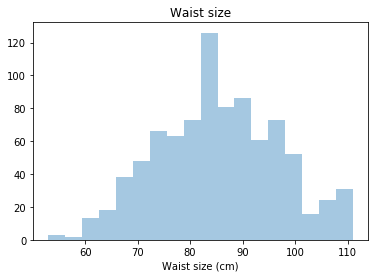

In [25]:
sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist size')
plt.xlabel('Waist size (cm)')
plt.show()

In [26]:
df['height'].value_counts()

170.0    62
180.0    53
165.0    51
175.0    50
172.0    45
160.0    45
168.0    44
178.0    36
163.0    32
169.0    31
173.0    29
162.0    29
167.0    28
176.0    28
183.0    26
182.0    25
185.0    24
174.0    23
171.0    20
177.0    19
158.0    19
181.0    18
186.0    17
187.0    16
164.0    16
166.0    15
161.0    15
179.0    13
157.0    11
155.0     9
156.0     9
188.0     9
184.0     9
159.0     6
190.0     6
192.0     5
153.0     4
152.0     4
189.0     4
154.0     4
150.0     3
195.0     3
193.0     3
151.0     3
191.0     2
197.0     1
145.0     1
Name: height, dtype: int64

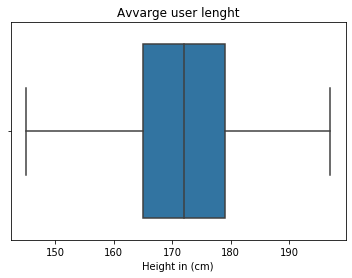

In [27]:
sns.boxplot(df['height']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Avvarge user lenght')
plt.xlabel('Height in (cm)')
plt.show()

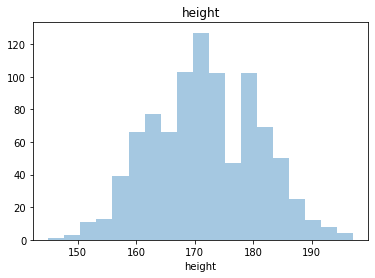

In [29]:
df["height"].name = 'height' #Labeling the variable for plotting
height_av = df["height"].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(height_av, kde=False)
plt.title('height')
plt.show()

The median of height is: 172.0 cm
The mean of height is: 171.7545945945946 cm


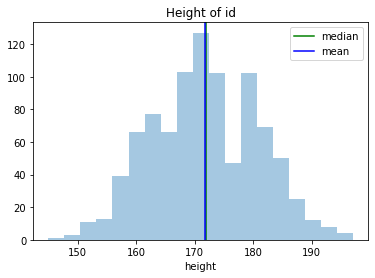

In [30]:
mean_size = df["height"].mean()
median_size = df["height"].median()
print(f'The median of height is: {median_size} cm')
print(f'The mean of height is: {mean_size} cm')
sns.distplot(height_av, kde=False)
plt.title('Height of id')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100
plt.axvline(mean_size, 0, 100, color='blue', label='mean')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()